In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df = pd.read_csv('tmp8.csv',encoding= "ISO-8859-1")

In [47]:
df = df.drop(['OS'],axis=1)

In [28]:
df['brand_name'] = df['Name'].str.split(' ').str[0]

In [48]:
df[['x_res', 'y_res']] = df['resolution'].str.extract('(\d+)\s*[xX]\s*(\d+)', expand=True)

In [29]:
df.rename(columns={'OS':'os'},inplace=True)

In [70]:
for i in df.index:
    if '4G' in df['Specifications'][i] :
        df.at[i,'four_g'] = 1
    else :
        df.at[i,'four_g'] = 0

In [71]:
for i in df.index:
    m = "Bluetooth Support Yes"
    if m in df['Specifications'][i] :
        df.at[i,'bluetooth'] = 1
    else :
        df.at[i,'bluetooth'] = 0

In [96]:
for i in df.index:
    if 'Wi-Fi Yes' in df['Specifications'][i] :
        df.at[i,'wifi'] = 1
    elif 'Wi-Fi Hotspot Yes' in df['Specifications'][i] :
        df.at[i,'wifi'] = 1
    elif 'Wi-Fi No' in df['Specifications'][i] :
        df.at[i,'wifi'] = 0
    else :
        df.at[i,'wifi'] = 0

In [99]:
for i in df.index:
    a = "Android"
    if a in df['Specifications'][i] :
        start = df['Specifications'][i].index("Android")+8
        end = df['Specifications'][i].index("Android")+10
        df.at[i,'OS'] = df['Specifications'][i][start:end]
    else :
        df.at[i,'OS'] = np.nan

In [30]:
for i in df.index :
    r = "Network"
    if (r in df['Specifications'][i]):
        start = df['Specifications'][i].index("Network")+11
        end = df['Specifications'][i].index("Network")+12
        df.at[i,'network_type'] = df['Specifications'][i][start:end].strip()
    else:
        df.at[i,'network_type'] = np.nan

In [ ]:
for i in df.index :
    r = "Primary Camera Available"
    if (r in df['Specifications'][i]):
        start = df['Specifications'][i].index("Primary Camera Available")+24
        end = df['Specifications'][i].index("Primary Camera Available")+27
        if df['Specifications'][i][start:end].strip()=="Ye":
            st = df['Specifications'][i].index("Yes Primary Camera")+18
            en = df['Specifications'][i].index("Yes Primary Camera")+21
            df.at[i,'primary_camera'] = df['Specifications'][i][st:en].strip()

In [ ]:
df['display_size'] = df['display_size'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            926 non-null    object 
 1   Price           926 non-null    int64  
 2   Specifications  926 non-null    object 
 3   ram             926 non-null    int64  
 4   rom             911 non-null    float64
 5   display_size    926 non-null    float64
 6   touch_screen    926 non-null    int64  
 7   n_cores         689 non-null    float64
 8   exp_storage     926 non-null    int64  
 9   clock_speed     651 non-null    float64
 10  frame_rate      358 non-null    float64
 11  battery_power   926 non-null    int64  
 12  refresh_rate    317 non-null    float64
 13  os              661 non-null    float64
 14  bluetooth       926 non-null    int64  
 15  wifi            926 non-null    int64  
 16  brand_name      883 non-null    object 
 17  network_type    926 non-null    int

In [25]:
print(df.isnull().sum())

Name                0
Price               0
Specifications      0
ram                 0
rom                15
display_size        0
touch_screen        0
n_cores           237
exp_storage         0
clock_speed       275
battery_power       0
os                265
bluetooth           0
wifi                0
brand_name         43
network_type        0
x_res               4
y_res               4
dtype: int64


In [88]:
df['bluetooth'] = df['bluetooth'].astype(int)

In [57]:
df.head(10)

,Name,Price,Specifications,ram,rom,display_size,touch_screen,n_cores,exp_storage,clock_speed,frame_rate,battery_power,refresh_rate,os,bluetooth,wifi,brand_name,network_type,x_res,y_res
0,"POCO M2 Pro ( Green and Greener, 64 GB)ÃÂÃÂ...",13999,"GeneralIn The BoxHandset, Power Adaptor, USBTy...",4000,64000.0,6.67,1,8.0,512000,2.3000,60.0,5000,NaN,10.0,1,1,POCO,4,2400.0,1080.0
1,"POCO M2 Pro ( Green and Greener, 128 GB)ÃÂÃ...",15999,"GeneralIn The BoxHandset, Power Adaptor, USBTy...",6000,128000.0,6.67,1,8.0,512000,2.3000,60.0,5000,NaN,10.0,1,1,POCO,4,2400.0,1080.0
2,"POCO M2 Pro ( Two Shades of Black, 128 GB)ÃÂ...",15999,"GeneralIn The BoxHandset, Power Adaptor, USBTy...",6000,128000.0,6.67,1,8.0,512000,2.3000,60.0,5000,NaN,10.0,1,1,POCO,4,2400.0,1080.0
3,SAMSUNG Guru Music 2ÃÂÃÂÃÂÃÂÃÂÃÂÃ...,2074,"GeneralIn The BoxHandsfree, Charger, Handset, ...",4,16000.0,2.00,0,1.0,16000,NaN,0.0,800,NaN,NaN,1,0,SAMSUNG,2,128.0,160.0
4,SAMSUNG Guru Music 2ÃÂÃÂÃÂÃÂÃÂÃÂÃ...,2067,"GeneralIn The BoxHandsfree, Charger, Handset, ...",4,NaN,2.00,0,1.0,16000,NaN,0.0,800,NaN,NaN,1,0,SAMSUNG,2,128.0,160.0
5,LAVA GEMÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,1679,"GeneralIn The Box1N Handset, 1N Battery, 1N Ch...",4,512.0,2.80,0,NaN,32000,0.0012,10.0,1750,NaN,NaN,1,0,LAVA,2,320.0,240.0
6,"OPPO K10 5G ( Midnight Black, 128 GB)ÃÂÃÂÃ...",16999,"GeneralIn The BoxHandset, Charger, USB Data Ca...",8000,128000.0,6.56,1,8.0,1000000,2.4000,120.0,5000,90.0,12.0,1,1,OPPO,5,1612.0,720.0
7,"OPPO K10 5G ( Ocean Blue, 128 GB)ÃÂÃÂÃÂÃ...",16999,"GeneralIn The BoxHandset, Charger, USB Data Ca...",8000,128000.0,6.56,1,8.0,1000000,2.4000,120.0,5000,90.0,12.0,1,1,OPPO,5,1612.0,720.0
8,"MOTOROLA g72 ( Meteorite Grey, 128 GB)ÃÂÃÂ...",15999,"GeneralIn The BoxHandset, 33W Turbopower Charg...",6000,128000.0,6.55,1,8.0,1000000,2.2000,120.0,5000,120.0,12.0,1,1,MOTOROLA,4,2460.0,1080.0
9,"realme 10 ( Rush Black, 64 GB)ÃÂÃÂÃÂÃÂ...",13999,"GeneralIn The BoxHandset, Adapter, USB Cable, ...",4000,64000.0,6.40,1,8.0,1000000,2.2000,120.0,5000,90.0,12.0,1,1,realme,4,2400.0,1080.0


In [40]:
df.to_csv("tmp9.csv")

Exploratory Data Analysis

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.shape

(926, 21)

In [6]:
df.columns

Index(['Name', 'Price', 'Specifications', 'ram', 'rom', 'display_size',
       'touch_screen', 'n_cores', 'exp_storage', 'clock_speed', 'frame_rate',
       'battery_power', 'refresh_rate', 'os', 'bluetooth', 'wifi', 'OS',
       'brand_name', 'network_type', 'x_res', 'y_res'],
      dtype='object')

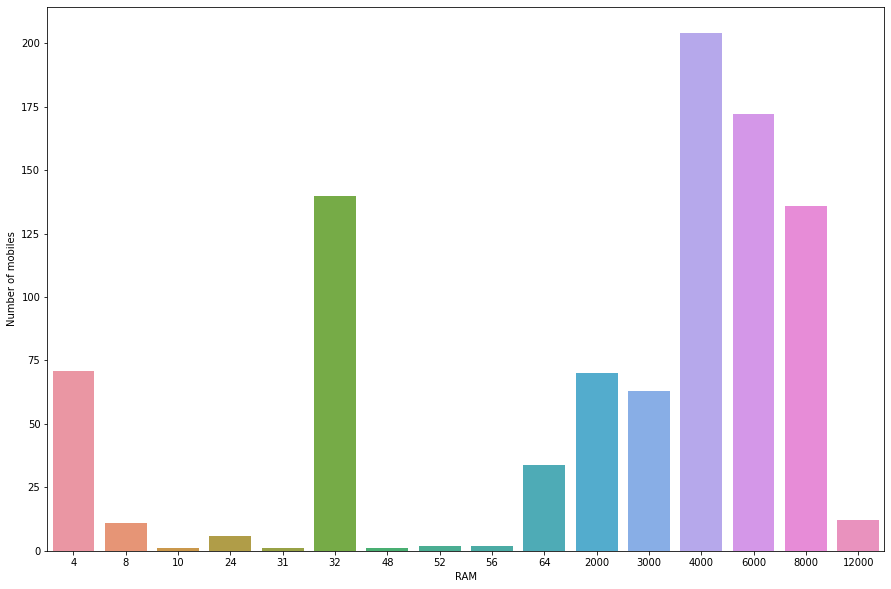

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='ram',data=df)

plt.xlabel('RAM')
plt.ylabel('Number of mobiles')


plt.show()

In [13]:
df.groupby('ram')['Price'].mean()

ram
4         1596.112676
8         2545.818182
10         829.000000
24        1465.166667
31         899.000000
32        1262.100000
48        2099.000000
52        1478.000000
56        1542.500000
64        1155.323529
2000      6570.842857
3000      8420.317460
4000     11821.568627
6000     16713.232558
8000     24972.308824
12000    54564.083333
Name: Price, dtype: float64

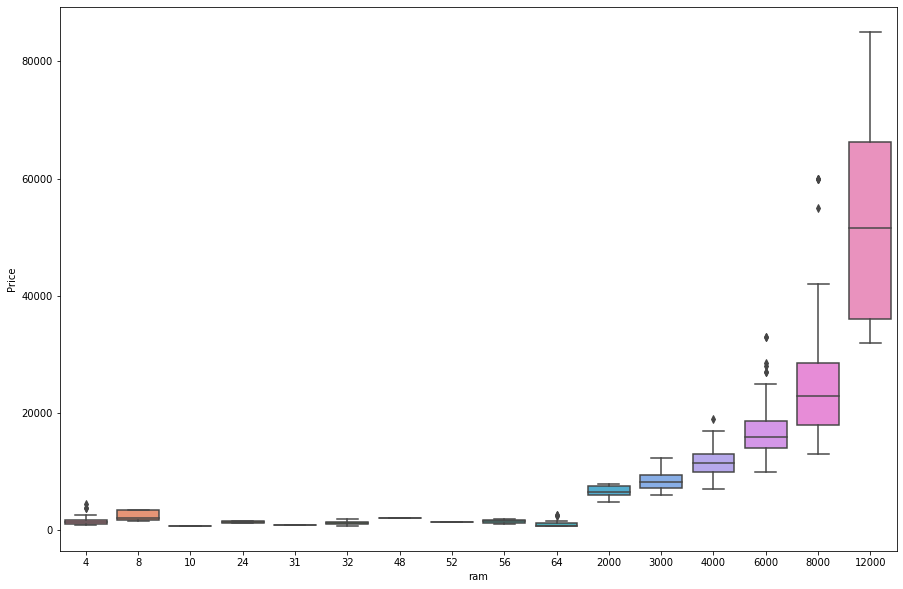

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='ram',y='Price',data=df)

plt.show()

In [15]:
df.corr()['Price']

C:\Users\Kedar\AppData\Local\Temp\ipykernel_12280\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Price            1.000000
ram              0.861586
rom              0.795300
touch_screen     0.616043
n_cores          0.326251
exp_storage      0.171183
clock_speed      0.638934
frame_rate       0.378380
battery_power    0.543495
bluetooth        0.306375
wifi             0.476656
OS               0.413231
network_type     0.746119
x_res            0.722085
y_res            0.538951
Name: Price, dtype: float64

array([[<AxesSubplot: xlabel='Price', ylabel='Price'>,
        <AxesSubplot: xlabel='ram', ylabel='Price'>,
        <AxesSubplot: xlabel='rom', ylabel='Price'>,
        <AxesSubplot: xlabel='exp_storage', ylabel='Price'>,
        <AxesSubplot: xlabel='battery_power', ylabel='Price'>],
       [<AxesSubplot: xlabel='Price', ylabel='ram'>,
        <AxesSubplot: xlabel='ram', ylabel='ram'>,
        <AxesSubplot: xlabel='rom', ylabel='ram'>,
        <AxesSubplot: xlabel='exp_storage', ylabel='ram'>,
        <AxesSubplot: xlabel='battery_power', ylabel='ram'>],
       [<AxesSubplot: xlabel='Price', ylabel='rom'>,
        <AxesSubplot: xlabel='ram', ylabel='rom'>,
        <AxesSubplot: xlabel='rom', ylabel='rom'>,
        <AxesSubplot: xlabel='exp_storage', ylabel='rom'>,
        <AxesSubplot: xlabel='battery_power', ylabel='rom'>],
       [<AxesSubplot: xlabel='Price', ylabel='exp_storage'>,
        <AxesSubplot: xlabel='ram', ylabel='exp_storage'>,
        <AxesSubplot: xlabel='rom', ylabel

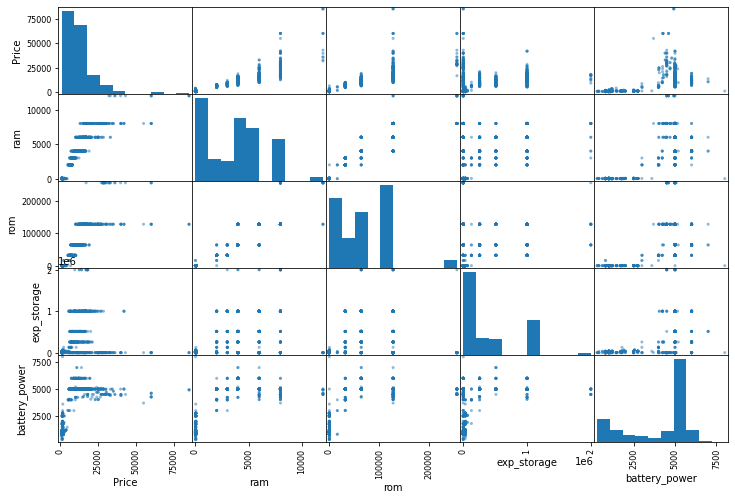

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["Price","ram","rom","exp_storage","battery_power"]
scatter_matrix(df[attributes],figsize=(12,8))

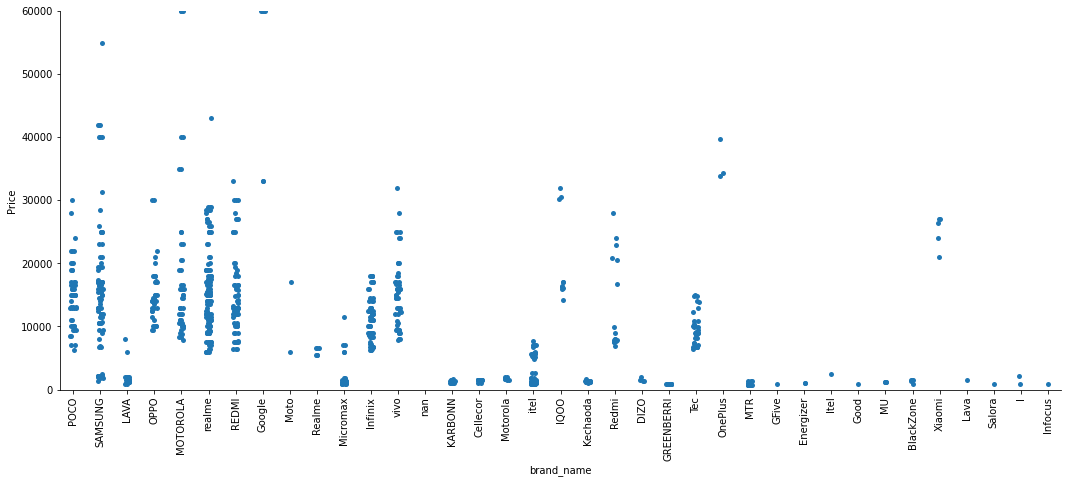

In [17]:
g = sns.catplot(x="brand_name", y="Price", data=df, height=6, aspect=15/6)
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 60000))

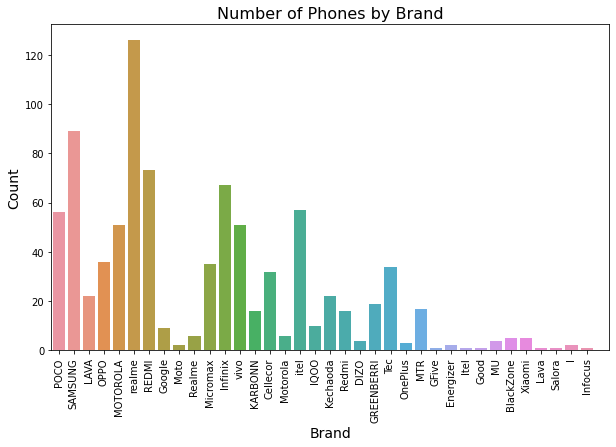

In [18]:
plt.figure(figsize=(10, 6))
g = sns.countplot(x="brand_name", data=df)
g.set_title("Number of Phones by Brand", fontsize=16)
g.set_xlabel("Brand", fontsize=14)
g.set_ylabel("Count", fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="center")
g.set(xlim=(-0.5, len(df["brand_name"].unique())-0.5))
plt.show()

C:\Users\Kedar\AppData\Local\Temp\ipykernel_12280\622710284.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)


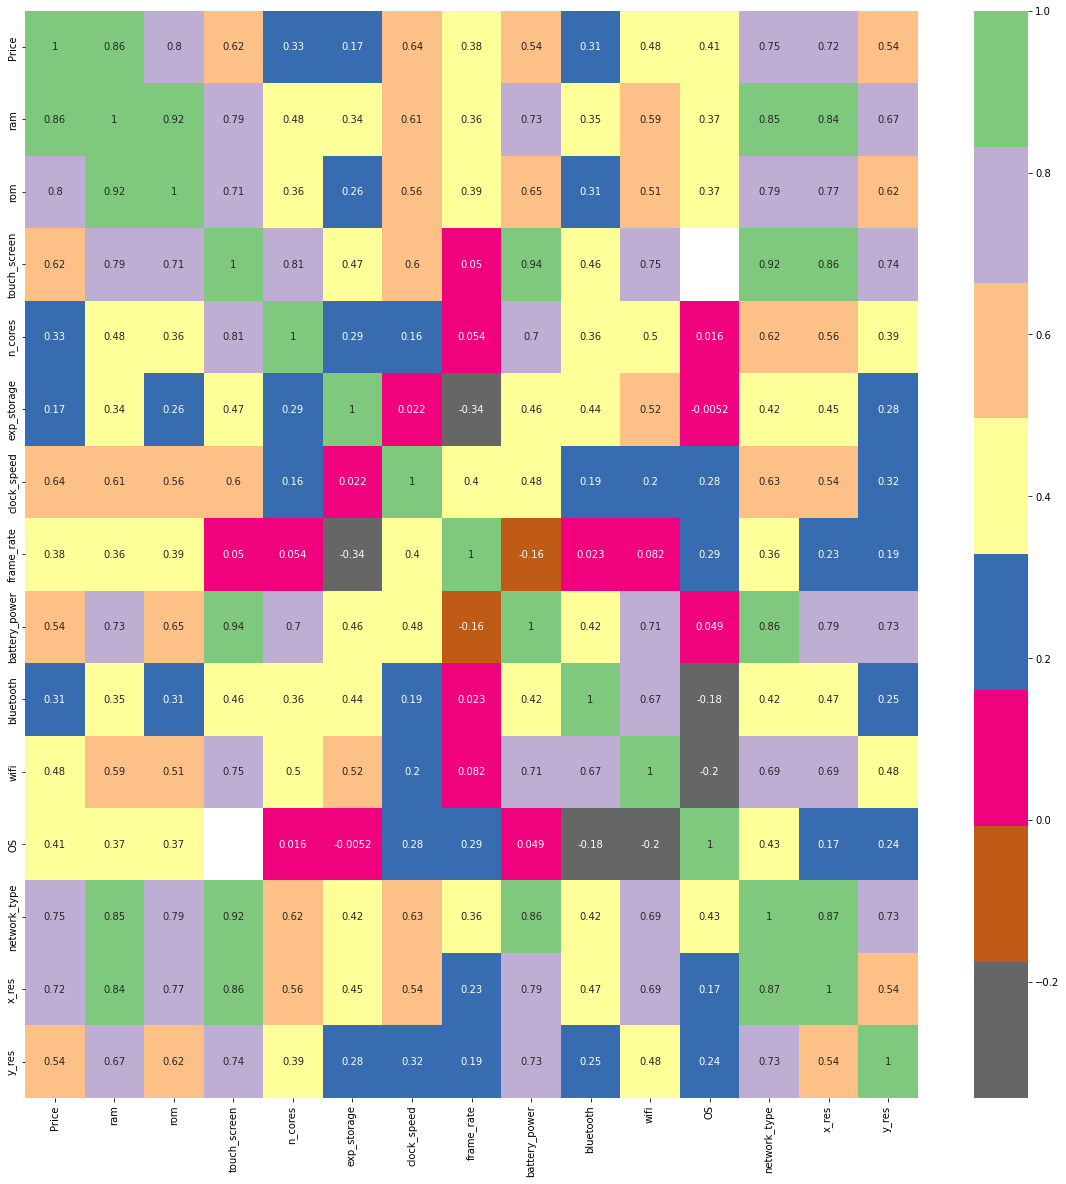

In [19]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

Model Selection:

In [3]:
X = df.drop(columns=['Price','Name','Specifications','brand_name'])
y = np.log(df['Price'])

In [4]:
X

,ram,rom,display_size,touch_screen,n_cores,exp_storage,clock_speed,battery_power,os,bluetooth,wifi,network_type,x_res,y_res
0,4000,64000.0,6.67,1,8.0,512000,2.3,5000,10.0,1,1,4,2400.0,1080.0
1,6000,128000.0,6.67,1,8.0,512000,2.3,5000,10.0,1,1,4,2400.0,1080.0
2,6000,128000.0,6.67,1,8.0,512000,2.3,5000,10.0,1,1,4,2400.0,1080.0
3,4,16000.0,2.00,0,1.0,16000,NaN,800,NaN,1,0,2,128.0,160.0
4,4,NaN,2.00,0,1.0,16000,NaN,800,NaN,1,0,2,128.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,6000,128000.0,6.49,1,8.0,0,2.0,5000,12.0,0,0,5,2400.0,1080.0
922,32,32.0,1.77,0,1.0,0,NaN,1000,11.0,0,0,2,240.0,320.0
923,8,16.0,2.80,0,NaN,0,NaN,1150,12.0,1,0,2,320.0,240.0
924,8,16.0,2.80,0,NaN,0,NaN,1150,11.0,1,0,2,320.0,240.0


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ram            926 non-null    int64  
 1   rom            911 non-null    float64
 2   display_size   926 non-null    float64
 3   touch_screen   926 non-null    int64  
 4   n_cores        689 non-null    float64
 5   exp_storage    926 non-null    int64  
 6   clock_speed    651 non-null    float64
 7   battery_power  926 non-null    int64  
 8   os             661 non-null    float64
 9   bluetooth      926 non-null    int64  
 10  wifi           926 non-null    int64  
 11  network_type   926 non-null    int64  
 12  x_res          922 non-null    float64
 13  y_res          922 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 101.4 KB


In [5]:
y

0      9.546741
1      9.680281
2      9.680281
3      7.637234
4      7.633854
         ...   
921    9.754988
922    7.002156
923    8.160232
924    8.160232
925    7.026427
Name: Price, Length: 926, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [8]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes


In [10]:
mean_n_cores = X_train['n_cores'].mean()
X_train['n_cores'].fillna(mean_n_cores, inplace=True)

X_test['n_cores'].fillna(mean_n_cores, inplace=True)

In [11]:
mean_n_cores = X_train['x_res'].mean()
X_train['x_res'].fillna(mean_n_cores, inplace=True)

X_test['x_res'].fillna(mean_n_cores, inplace=True)

In [12]:
mean_n_cores = X_train['y_res'].mean()
X_train['y_res'].fillna(mean_n_cores, inplace=True)

X_test['y_res'].fillna(mean_n_cores, inplace=True)

In [13]:
mean_n_cores = X_train['y_res'].mean()
X_train['y_res'].fillna(mean_n_cores, inplace=True)

X_test['y_res'].fillna(mean_n_cores, inplace=True)

In [14]:
mean_n_cores = X_train['clock_speed'].mean()
X_train['clock_speed'].fillna(mean_n_cores, inplace=True)

X_test['clock_speed'].fillna(mean_n_cores, inplace=True)

In [15]:
mean_n_cores = X_train['os'].mean()
X_train['os'].fillna(mean_n_cores, inplace=True)

X_test['os'].fillna(mean_n_cores, inplace=True)

In [16]:
mean_n_cores = X_train['rom'].mean()
X_train['rom'].fillna(mean_n_cores, inplace=True)

X_test['rom'].fillna(mean_n_cores, inplace=True)

In [104]:
print(X_train.isnull().sum())

ram              0
rom              0
display_size     0
touch_screen     0
n_cores          0
exp_storage      0
clock_speed      0
battery_power    0
os               0
bluetooth        0
wifi             0
network_type     0
x_res            0
y_res            0
dtype: int64


Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,f1_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.9567113609040141


KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2}")


R2 score: 0.9438251438054356


Desicion Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2}")


R2 score: 0.9771862370504081


Random Forest

In [17]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.9811621393106684


In [42]:
import pandas as pd
data = {
    'ram': 8000,            # MB
    'rom': 256000,          # MB
    'display_size': 6.5, # inches
    'touch_screen': 1,                            
    'n_cores': 8,            
    'exp_storage': 128000,  # MB
    'clock_speed': 2.3,  # GHz
    'battery_power': 5000, # mAh
    'os': 12,
    'bluetooth': 1,      
    'wifi': 1,           
    'network_type': 5,
    'x_res': 2400,       # pixels
    'y_res': 1080        # pixels
}

df = pd.DataFrame([data])
target_variable_prediction = model.predict(df)
print("\nPredicted target variable value:")
y_pred_actual = np.power(2.718, target_variable_prediction)
print(y_pred_actual)



Predicted target variable value:
[17726.79109998]
